In [2]:
!pip install snscrape
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install textblob
!pip insatall re
!pip install pandas
!pip install emot
!pip install vaderSentiment
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "insatall" - maybe you meant "install"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sia
from textblob import TextBlob
import re
import numpy as np

In [4]:
import nltk
nltk.download('stopwords') #run once 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

from emot.emo_unicode import UNICODE_EMOJI

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# not quite useful atleast in election oriented

# count_hash = {}
# count_at = {}

# def count_tags(tweet_text):
#     hash_tag = re.findall(r"#(\w+)", tweet_text)
#     at_tag = re.findall(r"@(\w+)", tweet_text)
    
#     if(len(hash_tag)!=0):
#         for i in hash_tag: 
#             if i not in count_hash.keys():
#                 count_hash[i] = 1
#             else:
#                 count_hash[i] += 1    
        
#         for i in at_tag: 
#             if i not in count_at.keys():
#                 count_at[i] = 1
#             else:
#                 count_at[i] += 1   

In [ ]:
#change
query = "Joe Biden lang:en"

tweets_with_loc = []

tweets = []

fr = open("rejected_tweets_analysis.txt", "a")

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):   
    if i>20000:
        break

    else:
        if(len(tweet.content.split()) >= 10): #why 10
            if str(tweet.user.location) != "" :
                tweets_with_loc.append(str(tweet.user.location))
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])
            # count_tags(tweet.content)
        else:
            # pass
            fr.write(tweet.content + " " + str(len(tweet.content.split())) + "\n")
            # print(tweet.content, len(tweet.content.split()))

# print(tweets_with_loc) # 500 me se 284; with correct locations


In [ ]:
# number_of_tweets = len(tweets)
# df = pd.DataFrame(tweets, columns = ['date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
# df.to_csv('sentiment.csv')


df = pd.read_csv('/content/drive/MyDrive/dsci_project/tweets_donald_trump.csv')
number_of_tweets = len(df) + 1

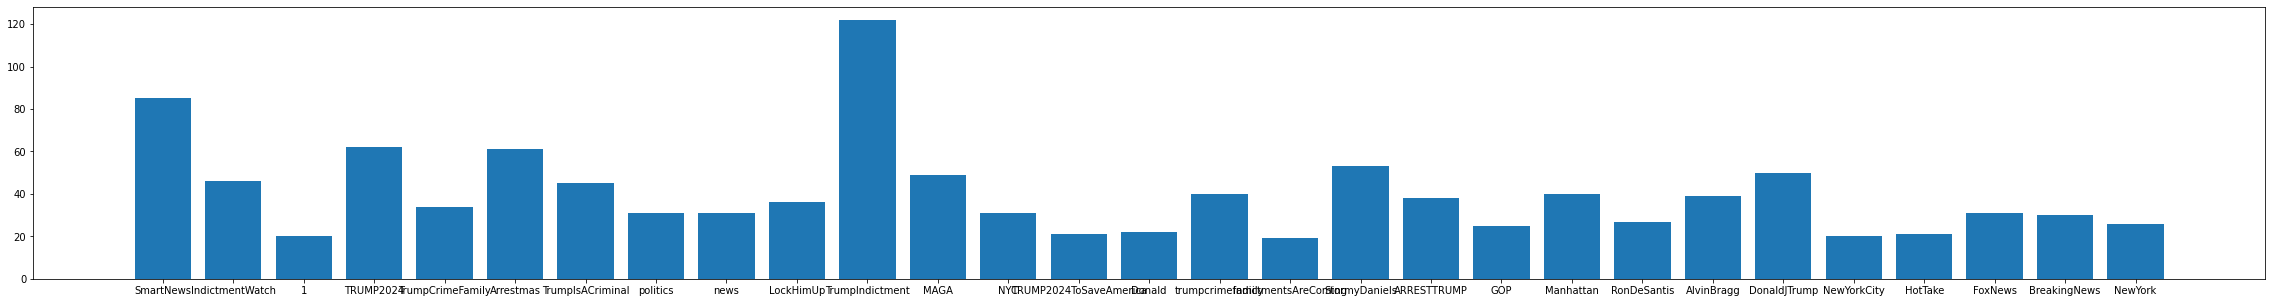

In [ ]:
hashtags = {}
# mentions = {}

def count_tags(tweet_text):
    hashtag = re.findall(r"#(\w+)", tweet_text)
    # mentions = re.findall(r"@(\w+)", tweet_text)
    
    if(len(hashtag)!=0):
        for i in hashtag: 
            if i not in hashtags.keys():
                hashtags[i] = 1
            else:
                hashtags[i] += 1    
        
        # for i in mention: 
        #     if i not in mentions.keys():
        #         mentions[i] = 1
        #     else:
        #         mentions[i] += 1   

df['tweet'].apply(count_tags)
# print(count_mentions)
# print()
# print(hashtags)

hashtagslist = list(hashtags.keys())

for key in hashtagslist:
    if (hashtags[key] < 0.001 * number_of_tweets) or (hashtags[key] > 0.01 * number_of_tweets):
        del hashtags[key]

hashtagslist = list(hashtags.keys())
frequencies = list(hashtags.values())

plt.bar(range(len(hashtagslist)), frequencies, tick_label=hashtagslist)
plt.rcParams['figure.figsize'] = [40, 5]
plt.show()

In [ ]:
eng_stop_words = list(stopwords.words('english'))
# emoji = list(UNICODE_EMOJI.keys())

In [ ]:
def filtering(text):
    text = text.lower()

    #mentions, hashtags, any character except, urls?
    # text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    
    # hahtags remove?
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())

    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    # filtered_words = [w for w in filtered_words if w not in emoji]

    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)

    return text

#test
# filtering("@kvenkat1680 @SecularFringe @GemsOfBollywood Those will loss Who were faking despite of political alignments. As per Hindenberg, Adani manipulated &; used a fake assets scene and https://www.sdhvb.com he is getting rewards for his deeds, no surprise. As per your views the super hit movies are unable to stay on screen for more than two weeks. #Truth")


df['filtered_tweets'] = df['tweet'].apply(filtering)

In [ ]:
polar = 0
pnn = [0, 0, 0]

# def polarity(tweet):
#     global polar, pos, neu, neg
#     curr_pol = TextBlob(tweet).sentiment.polarity
    
#     if curr_pol > 0 : pnn[0] += 1
#     elif curr_pol == 0 : pnn[1] += 1
#     else : pnn[2] += 1

#     polar += curr_pol
#     return curr_pol

# df['polarity'] = df['filtered_tweets'].apply(polarity)
# df.head(20)

def vader_polarity(text):
    score = sia().polarity_scores(text)
    compound_score = score['compound']

    global polar, pos, neu, neg
    # curr_pol = TextBlob(tweet).sentiment.polarity
    
    if compound_score > 0 : pnn[0] += 1
    elif compound_score == 0 : pnn[1] += 1
    else : pnn[2] += 1

    polar += compound_score
    return compound_score

#polarity ke jagah sentiment bharne chahiye
df['polarity'] = df['filtered_tweets'].apply(vader_polarity)

In [ ]:
df.to_csv('/content/drive/MyDrive/dsci_project/tweets_with_polarity.csv', mode = 'w')

# df = pd.read_csv('/content/drive/MyDrive/dsci_project/tweets_with_polarity.csv')

In [ ]:
# print("sentiment polarity : ", polar*100 / len(tweets))
print("positive tweets :", pnn[0]*100 / number_of_tweets, "%")
print("neutral tweets :", pnn[1]*100 / number_of_tweets, "%")
print("negative tweets :", pnn[2]*100 / number_of_tweets, "%")

<BarContainer object of 3 artists>

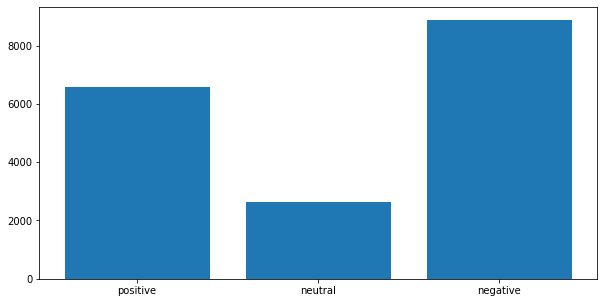

In [ ]:
# graphs 
# common words
# no. of positive and negative tweets over a period

x_axis = ["positive", "neutral", "negative"]

plt.rcParams['figure.figsize'] = [10, 5]
plt.bar(x_axis, pnn)


In [ ]:
#problem

tweets_string = df['filtered_tweets'].tolist()
tweets_string = " ".join(tweets_string)

tweets_string = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweets_string).split())

tweets_list = tweets_string.split()

#change
words_not_to_include = ["donald", "trump"]

tweets_list = [i for i in tweets_list if (i not in words_not_to_include and len(i)>2)]

tweets_string = " ".join(tweets_list)

# print+(tweets_string)

w_cloud = WordCloud(collocations = False, max_words=200, background_color = 'white', width = 14000, height = 10000).generate(tweets_string)
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

# print(len(states))

In [5]:
df = df.fillna(0)

for index, row in df.iterrows():
  if row.location:
    locationSplit = row.location.split(',')
    for word in locationSplit:
      word_stripped = word.strip()
      if word_stripped in states:
        df.loc[index, 'state'] = word_stripped
      elif word_stripped in stateCodes:
        df.loc[index, 'state'] = stateMapping[word_stripped]
        
df.to_csv('/content/drive/MyDrive/dsci_project/tweets_with_polarity_and_location.csv', mode = 'w')

In [35]:
df = pd.read_csv('/content/drive/MyDrive/dsci_project/tweets_with_polarity_and_location.csv')
number_of_tweets = len(df) + 1
df = df.fillna(0)

arr = np.zeros((50, 3))

no_of_tweets_with_state = 0
for index, row in df.iterrows():
  if not row['state'] :
    continue
  no_of_tweets_with_state += 1
  score = sia().polarity_scores(row['filtered_tweets'])
  compound_score = score['compound']

  if compound_score > 0 : 
    arr[states.index(row['state'])][0] += 1
  elif compound_score == 0 : arr[states.index(row['state'])][1] += 1
  else : 
    arr[states.index(row['state'])][2] += 1




tweets with proper location =  27.39491150442478


In [41]:
print("tweets with proper location = ", no_of_tweets_with_state, "(", int(no_of_tweets_with_state/number_of_tweets * 100), "% )")

tweets with proper location =  4953 ( 27 % )


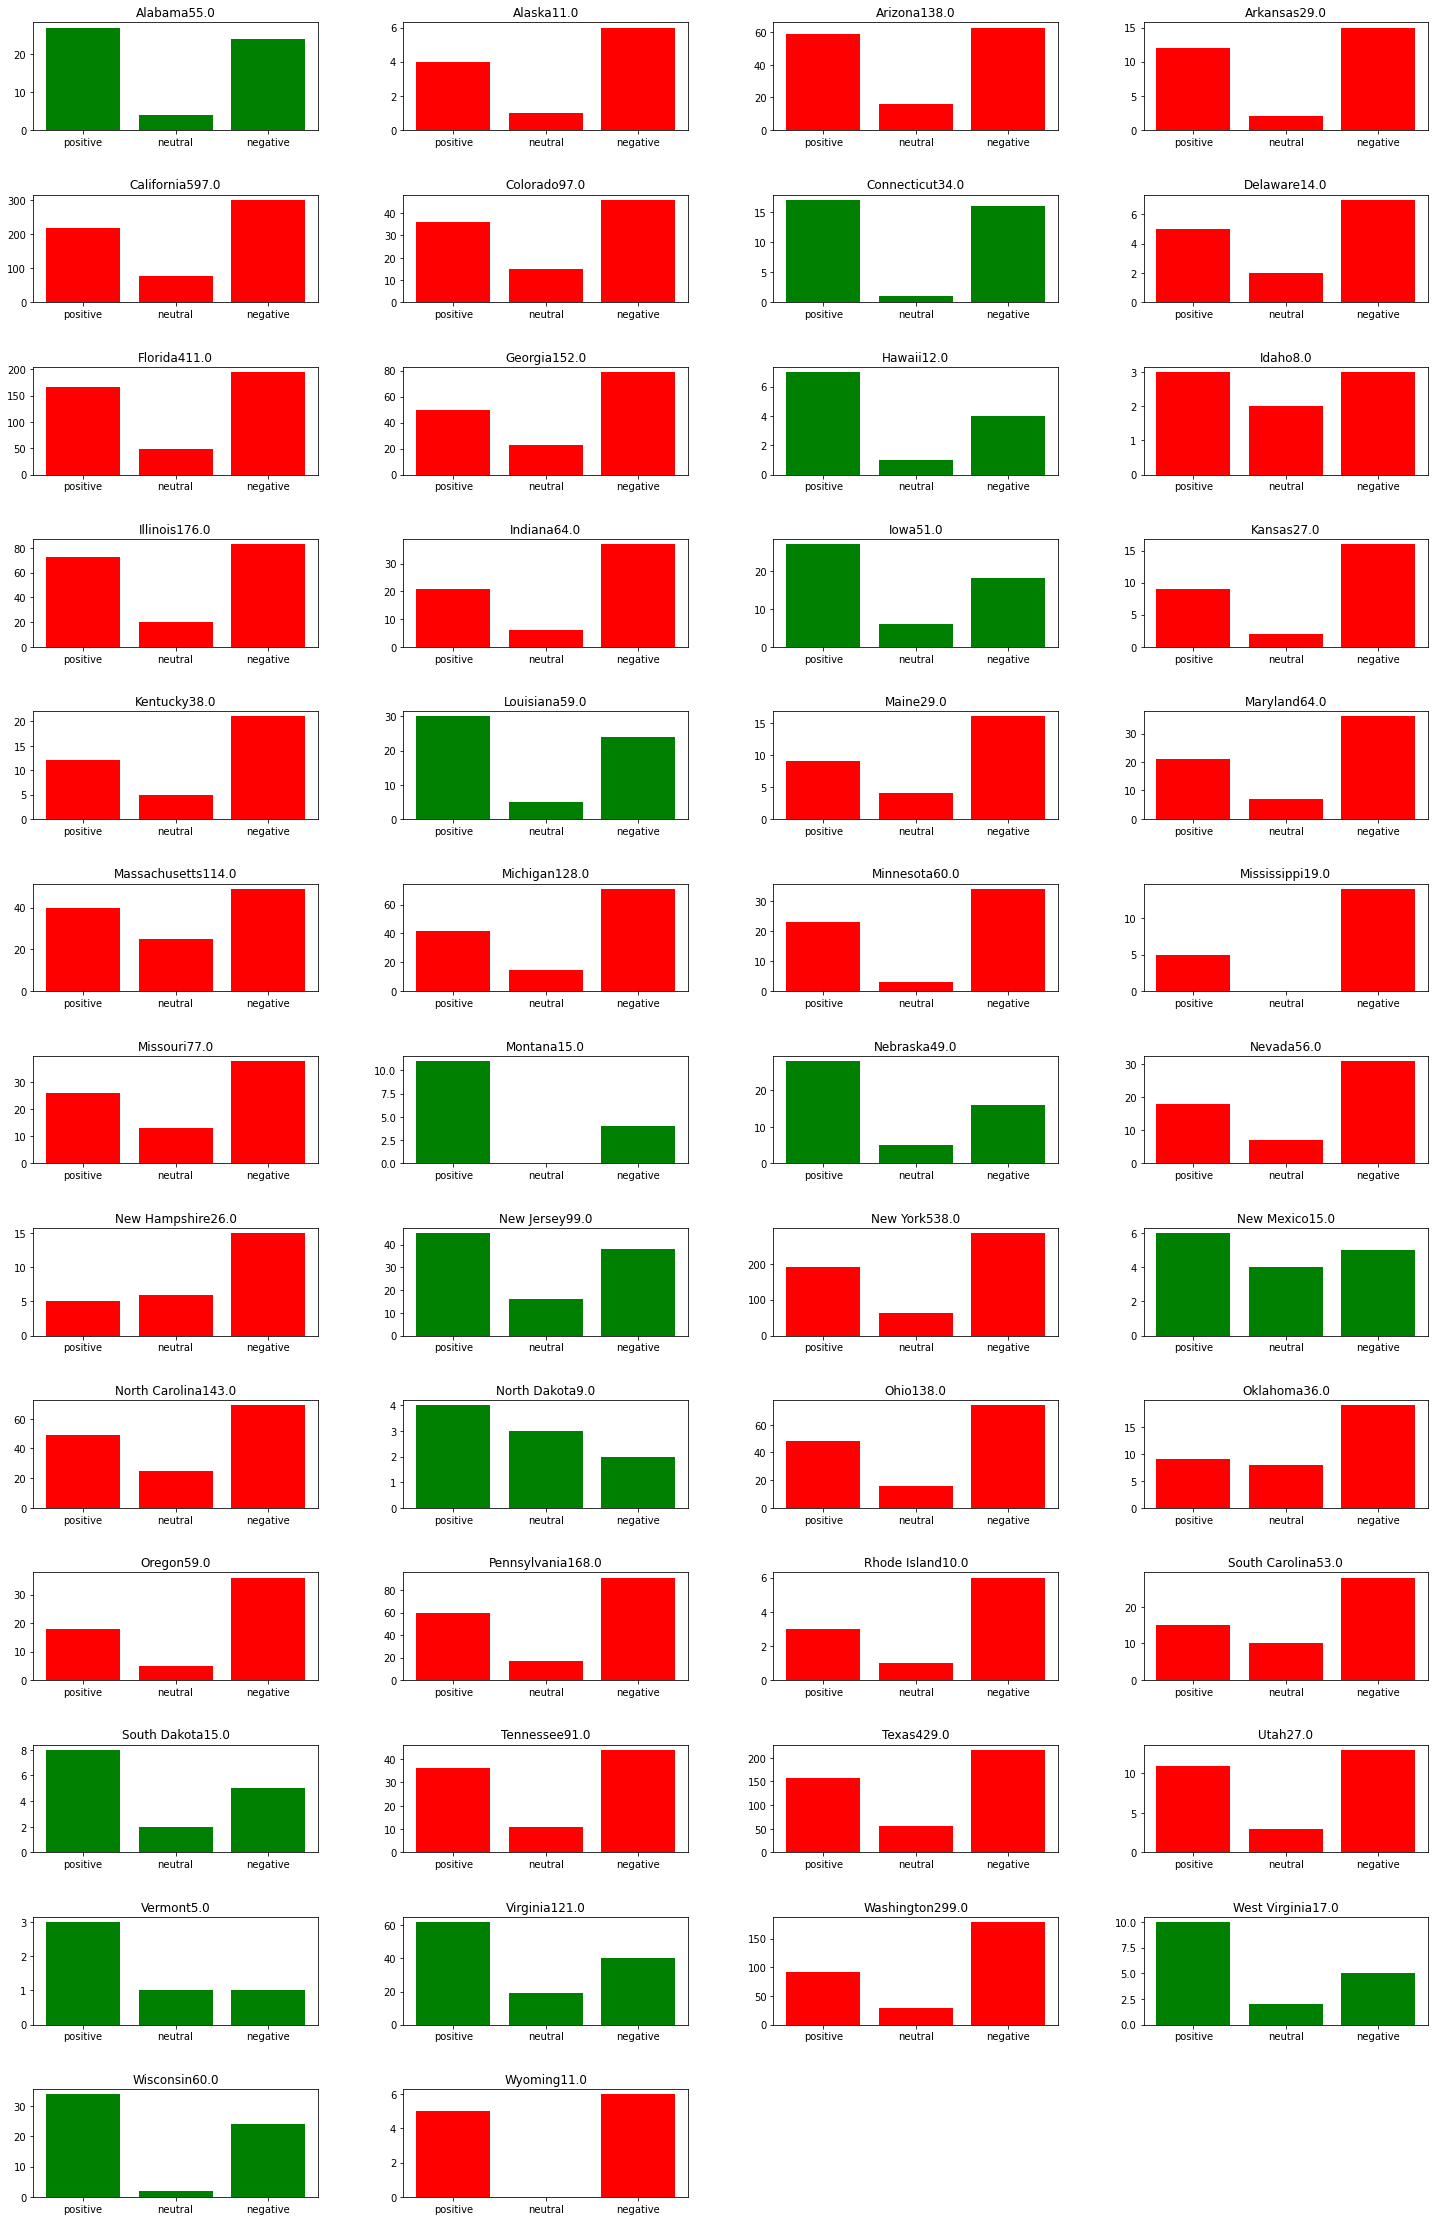

In [42]:
x_axis = ["positive", "neutral", "negative"]
plt.rcParams['figure.figsize'] = [25, 40]

plt.subplots_adjust(wspace=0.3, hspace=0.6)

for i in range(50):
  plt.subplot(13, 4, i+1)
  plt.title(states[i] + " " + str(arr[i][0]+arr[i][1]+arr[i][2]))
  if(arr[i][0] > arr[i][2]) :
    color = 'green'
  else :
    color = 'red'
  plt.bar(x_axis, arr[i], color=color)
  
plt.show()
